In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors
import pylab 
import scipy.stats as stats

In [4]:
df = pd.read_csv('data/AZWaterTrends.csv')

df.head(12)

,Station Name,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Baker Butte,25.1,33.9,42.7,25.6,36.8,28.6,29.6,38.4,25.1,...,22.6,24.8,26.1,19.2,23.7,28.1,31.9,17.3,28.6,27.2
1,Baldy,21.4,30.6,31.3,26.2,32.7,25.7,35.0,34.8,17.8,...,19.1,23.5,25.5,20.5,21.9,24.8,30.1,18.8,29.7,21.1
2,Coronado Trail,20.1,20.3,28.2,23.7,27.7,30.3,28.7,28.0,16.0,...,17.9,19.9,19.6,15.0,16.2,14.3,17.9,11.3,18.4,15.8
3,Fry,18.7,29.9,39.5,15.5,28.5,28.5,22.3,28.3,18.8,...,24.8,23.2,24.9,19.6,27.3,23.9,32.9,16.6,31.6,24.4
4,Hannagan Meadows,25.5,30.9,38.7,32.0,38.5,26.0,25.3,34.4,15.8,...,22.1,23.3,27.5,22.9,26.8,22.5,31.2,19.3,34.3,24.5
5,Heber,20.0,33.1,39.9,24.3,28.0,27.8,27.2,31.2,22.0,...,24.3,24.8,28.9,19.9,27.1,26.2,32.0,15.1,28.4,28.5
6,Maverick Fork,18.9,24.2,30.5,22.5,33.2,16.6,26.3,26.0,15.9,...,13.9,17.0,22.7,14.9,23.3,19.4,24.2,9.4,24.2,21.3
7,Mormon Mountain,22.4,36.7,42.0,23.6,31.6,31.3,22.3,28.9,19.8,...,22.8,26.0,27.3,24.2,31.5,28.9,34.7,13.9,33.1,24.4
8,Promontory,27.0,41.0,45.0,26.0,42.6,31.8,30.6,40.0,23.1,...,27.5,28.1,39.6,20.8,29.4,28.6,40.3,10.8,36.4,29.7
9,White Horse Lake,25.3,28.7,32.2,19.6,26.8,23.3,22.8,31.3,14.9,...,25.6,18.5,24.3,12.5,16.8,21.8,27.0,14.3,25.2,19.9


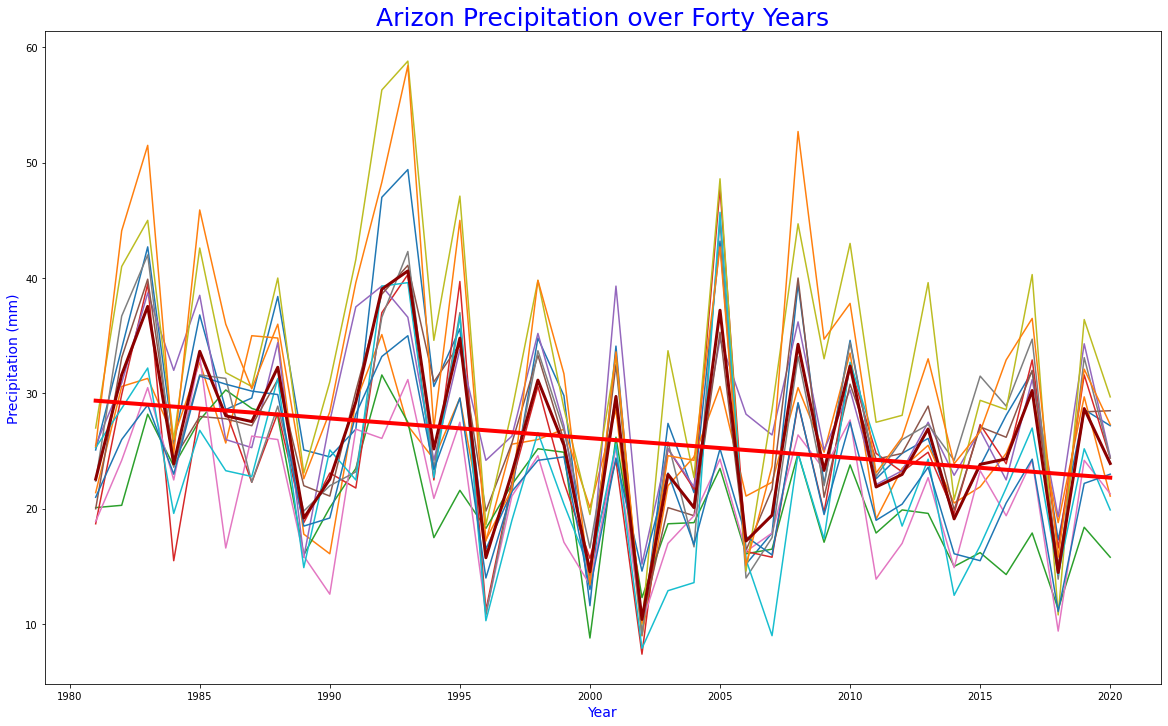

In [39]:
#start with rows with complete datasets
full = df.set_index('Station Name')

full = full.apply(pd.to_numeric, errors='coerce')

#print(full)

cols = full.columns.astype('float')

mean_prec = full.mean(axis=0)
#print(mean_prec)

#print(cols)

fig, ax = plt.subplots(figsize=(20,12))
ax.set_title('Arizon Precipitation over Forty Years', fontsize=25, color='blue')
ax.set_xlabel('Year', fontsize=14, color='blue')
ax.set_ylabel('Precipitation (mm)', fontsize=14, color='blue')
fig.tight_layout

for idx, row in full.iterrows():
    y_val = row.values.astype('float')
    ax.plot(cols, y_val)

ax.plot(cols,mean_prec, lw='3', color='darkred', linestyle='-')    

# Fit line to data using polynomial least squares fit
# x = cols, y= mean_prec
m, b = np.polyfit(cols, mean_prec, 1) #m = slope, b = intercept #slope = -0.17
ax.plot(cols, m*cols + b, color='red', lw=4)





    


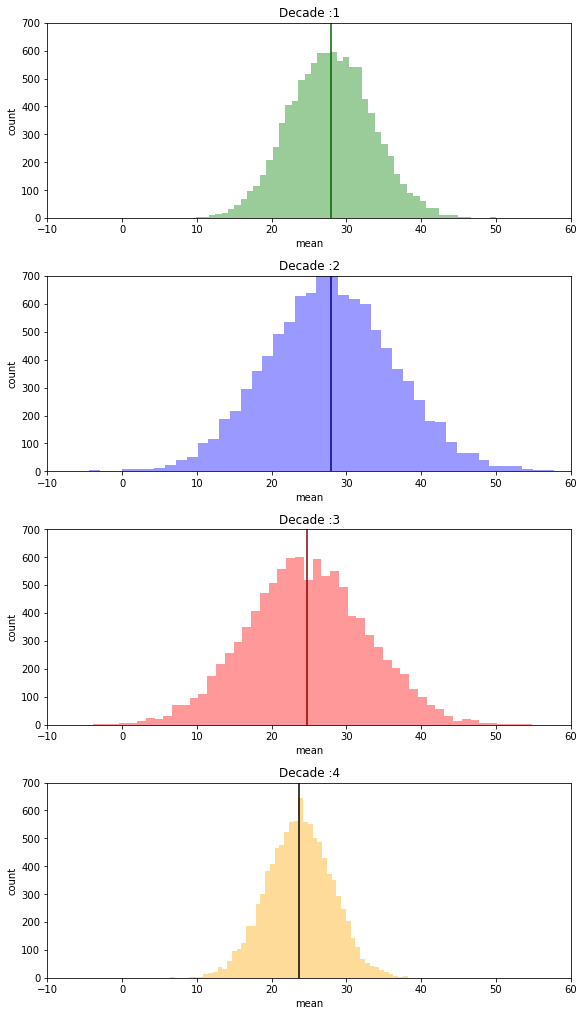

In [27]:
from scipy.stats import norm
import seaborn as sns
#plot 10 year means in histograms

# Define the seed so that results can be reproduced
seed = 11
rand_state = 11
rand = np.random.RandomState(seed)    

mean_prec = full.mean(axis=0)

#print(mean_prec)

fig, axs = plt.subplots(4,1, figsize=(8,14), constrained_layout=True)
plt_ind_list = np.arange(6)+231
colors = ['green','blue','red','orange','yellow']
lines = ['darkgreen','darkblue','darkred','black']

ten_yr = []
ten_yr_summ = []

#create 10-year data sets to base our normal distribution on
for i in range(0,40,10):
    ten_yr.append(np.array(mean_prec[i:i+10]))

#print(ten_yr)


for i in range(4):
    period_mean = ten_yr[i].mean()
    stdev = ten_yr[i].std()
    
    ten_yr_summ.append([period_mean,stdev])

    #get a normal sample based on the ten year mean, std of each sample
    data_norm = norm.rvs(size=10000, loc=period_mean, scale=stdev)
    y = norm.pdf(data_norm,0,1)
    
    
    axs[i].hist(data_norm,bins=50,color=colors[i], alpha=0.4)
    axs[i].vlines(period_mean,0,700,colors=lines[i])
    axs[i].set_xlabel('mean')
    axs[i].set_xlim(-10,60)
    axs[i].set_ylim(0,700)
    axs[i].set_ylabel('count')
    axs[i].set_title('Decade :' + str(i+1))

    #axs[i,1].plot(data_norm,y,color=colors[i])
    #axs[1,i].vlines(period_mean,0,700,colors=lines[i])
    #axs[1,i].set_xlabel('mean')
    #axs[1,i].set_xlim(-10,60)
    #axs[1,i].set_ylim(0,700)
    #axs[1,i].set_ylabel('count')
    #axs[i,1].set_title('Probability Density of Decade :' + str(i+1))





In [33]:
#print(ten_yr_summ)

#Is last decade statistically different than first decade - use the ten_yr_summ!

#print(ten_yr_summ)

for i in range(3):
    t, p = stats.ttest_ind(ten_yr[i], ten_yr[3])
    

#0 Decade to Last Decade p-value: 0.08699582881507466
#1 Decade to Last Decade p-value: 0.19416225315164418
#2 Decade to Last Decade p-value: 0.7313857541194515

  

0 Decade to Last Decade p-value: 0.08699582881507466
1 Decade to Last Decade p-value: 0.19416225315164418
2 Decade to Last Decade p-value: 0.7313857541194515


In [3]:
#is there a relationship between temperature and precipitation
phx = pd.read_csv('data/Phoenix_Weather.csv')

#print(len(phx))
phx = phx[phx.Precipitation != 999]             #clean data remove rows with 999 values
phx['Temp-F'] = phx.Temperature * 9/5 + 32      #put temp into farenheit
phx['Rain'] = phx.Precipitation > 0             #set a column to identify day of rain
phx['Rain-Inch'] = phx.Precipitation * .03937   #put precipitation into inches from mm

#print(phx)


Text(0, 0.5, 'Relative Humidity')

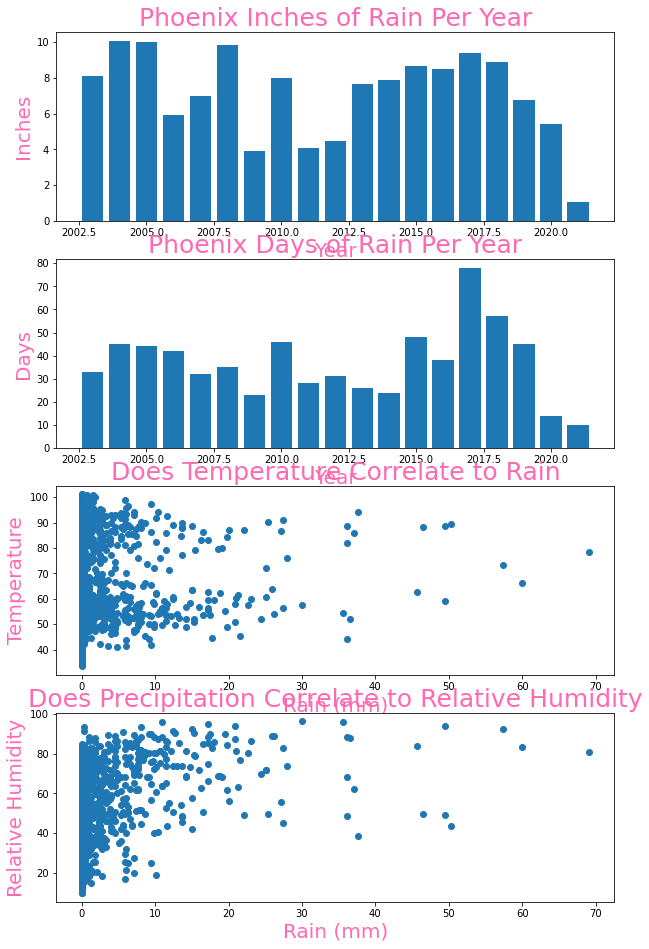

In [5]:

#print(len(phx))

#print(index)

rain = phx[phx.Rain]

days = rain.groupby('Year')['Rain'].count()
inches = rain.groupby('Year')['Rain-Inch'].sum()

fig, axs = plt.subplots(4, 1, figsize=(10,16))
fig.tight_layout

axs[0].bar(inches.index, inches)
axs[0].plot()
axs[0].set_title('Phoenix Inches of Rain Per Year', fontsize=25, color='hotpink')
axs[0].set_ylabel('Inches', fontsize=20, color='hotpink')
axs[0].set_xlabel('Year',  fontsize=20, color='hotpink')

axs[1].bar(days.index, days)
axs[1].plot()
axs[1].set_title('Phoenix Days of Rain Per Year', fontsize=25, color='hotpink')
axs[1].set_xlabel('Year',  fontsize=20, color='hotpink')
axs[1].set_ylabel('Days',  fontsize=20, color='hotpink')

axs[2].scatter(phx.Precipitation, phx['Temp-F'])
axs[2].plot()
axs[2].set_title('Does Temperature Correlate to Rain', fontsize=25, color='hotpink')
axs[2].set_xlabel('Rain (mm)',  fontsize=20, color='hotpink')
axs[2].set_ylabel('Temperature',  fontsize=20, color='hotpink')

axs[3].scatter(phx.Precipitation, phx.RelativeHumidity)
axs[3].plot()
axs[3].set_title('Does Precipitation Correlate to Relative Humidity', fontsize=25, color='hotpink')
axs[3].set_xlabel('Rain (mm)',  fontsize=20, color='hotpink')
axs[3].set_ylabel('Relative Humidity',  fontsize=20, color='hotpink')

#print(inches)

#rain.head(20)

In [6]:
def make_draws(dist, params, size=200):
    return dist(**params).rvs(size)

def plot_means(ax, dist, dist_name, params,  size=200, repeat=5000):
    samples = np.zeros((repeat, size))
    for idx in range(repeat):
        samples[idx, :] = make_draws(dist, params, size=size)
    sample_means = np.mean(samples, axis=1)
    ax.hist(sample_means, bins=25)
    ax.set_xlabel("mean")
    ax.set_xlim(6,16)
    ax.set_ylabel("count")
    #ax.set_title(f"Sample means of randomly generated data from a {dist_name} distribution")

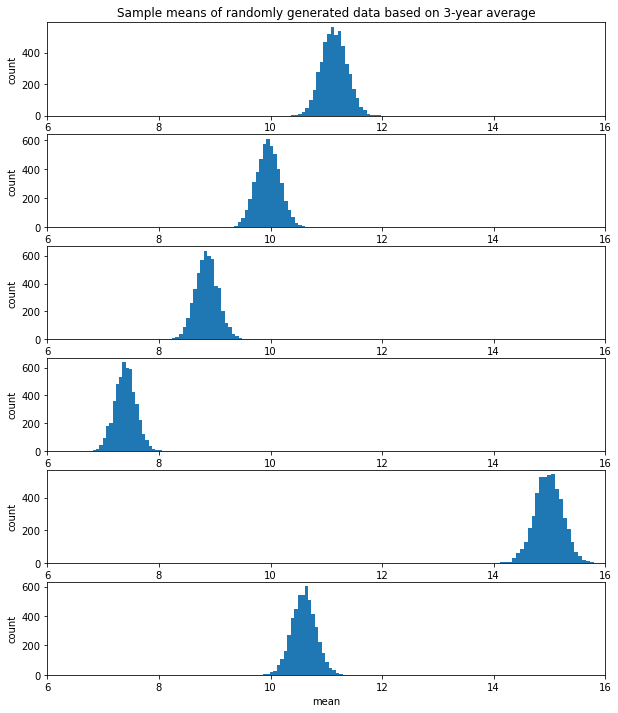

In [7]:
#days of rain should be a binomial distribution, take 3 year slices and model them
rain_prob = days/365
three_year1 = rain_prob[0:3].mean()
three_year2 = rain_prob[3:6].mean()
three_year3 = rain_prob[6:9].mean()
three_year4 = rain_prob[9:12].mean()
three_year5 = rain_prob[12:15].mean()
three_year6 = rain_prob[15:18].mean()

fig, axs = plt.subplots(6,1, figsize=(10,12))
fig.tight_layout

axs[0].set_title('Sample means of randomly generated data based on 3-year average')

plot_means(axs[0], stats.binom, "binomial", {'n':100, 'p': three_year1})
plot_means(axs[1], stats.binom, "binomial", {'n':100, 'p': three_year2})
plot_means(axs[2], stats.binom, "binomial", {'n':100, 'p': three_year3})
plot_means(axs[3], stats.binom, "binomial", {'n':100, 'p': three_year4})
plot_means(axs[4], stats.binom, "binomial", {'n':100, 'p': three_year5})
plot_means(axs[5], stats.binom, "binomial", {'n':100, 'p': three_year6})

